In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [2]:
all_data = pd.read_csv("data/all_data_m.csv")
all_data.head()

,time,time.1,replies_count,retweets_count,top_tw,likes_count,dogecoin,dogearmy,elonmusk,buy,...,big,got,dogeto,dip,wallet,open,high,low,tv,Volume
0,2021-01-02,1,17.0,34.0,0,149.0,5,0,1,1,...,0,1,0,0,0,0.005818,0.005854,0.005564,-3,11123815.0
1,2021-01-02,2,8.0,90.0,0,70.0,5,0,1,1,...,0,0,0,0,3,0.005754,0.006431,0.005701,5,32955177.0
2,2021-01-02,3,9.0,43.0,0,133.0,8,0,0,0,...,2,0,0,0,0,0.006353,0.006791,0.006066,5,108807546.0
3,2021-01-02,4,32.0,109.0,0,277.0,11,0,4,0,...,0,0,0,0,4,0.006670,0.007981,0.006654,5,166272032.0
4,2021-01-02,5,28.0,90.0,1,382.0,3,0,0,2,...,0,0,0,0,0,0.007756,0.007776,0.006965,-5,90792179.0


In [15]:
all_data["tv"].value_counts()

 0    377
 5    375
-5    330
-2    302
 2    290
 1    282
-1    264
-3    212
 3    150
 4    112
-4    104
Name: tv, dtype: int64

In [3]:
all_data = all_data.iloc[:,2:-1].apply(pd.to_numeric)

In [4]:
X = all_data.drop(columns='tv')
y = all_data['tv']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train, columns =['tv'])
y_test  = pd.DataFrame(y_test, columns =['tv'])

In [18]:
y_train["tv"].value_counts()

 5    276
 0    272
-5    229
-2    209
 1    199
 2    197
-1    179
-3    141
 3    104
 4     83
-4     69
Name: tv, dtype: int64

<AxesSubplot:xlabel='tv', ylabel='count'>

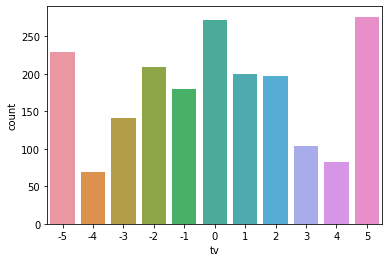

In [6]:
sns.countplot(x=y_train['tv'])

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)
y.value_counts()

-3    377
 5    377
-5    377
 4    377
 0    377
-1    377
 2    377
-4    377
 3    377
-2    377
 1    377
Name: tv, dtype: int64

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

nb.fit(X_train_res, y_train_res['tv'])
rf.fit(X_train_res, y_train_res['tv'])

RandomForestClassifier()

In [22]:
y_train_res_pred_rf = rf.predict(X_train_res)
y_test_pred_rf      = rf.predict(X_test)

In [23]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))


In [24]:
model_performance_class(y_train_res, y_train_res_pred_rf, y_test, y_test_pred_rf)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

          -5       1.00      1.00      1.00        69
          -4       1.00      1.00      1.00        69
          -3       1.00      1.00      1.00        69
          -2       1.00      1.00      1.00        69
          -1       1.00      1.00      1.00        69
           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00        69
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        69
           5       1.00      1.00      1.00        69

    accuracy                           1.00       759
   macro avg       1.00      1.00      1.00       759
weighted avg       1.00      1.00      1.00       759

Results obtained for the TEST SET
The Cohen's Kappa is: 0.07
              precision    recall  f1-score   support

         